# Load DPC data files and make top level statistics

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

## (1) load pickle file duopoly_feedback.data
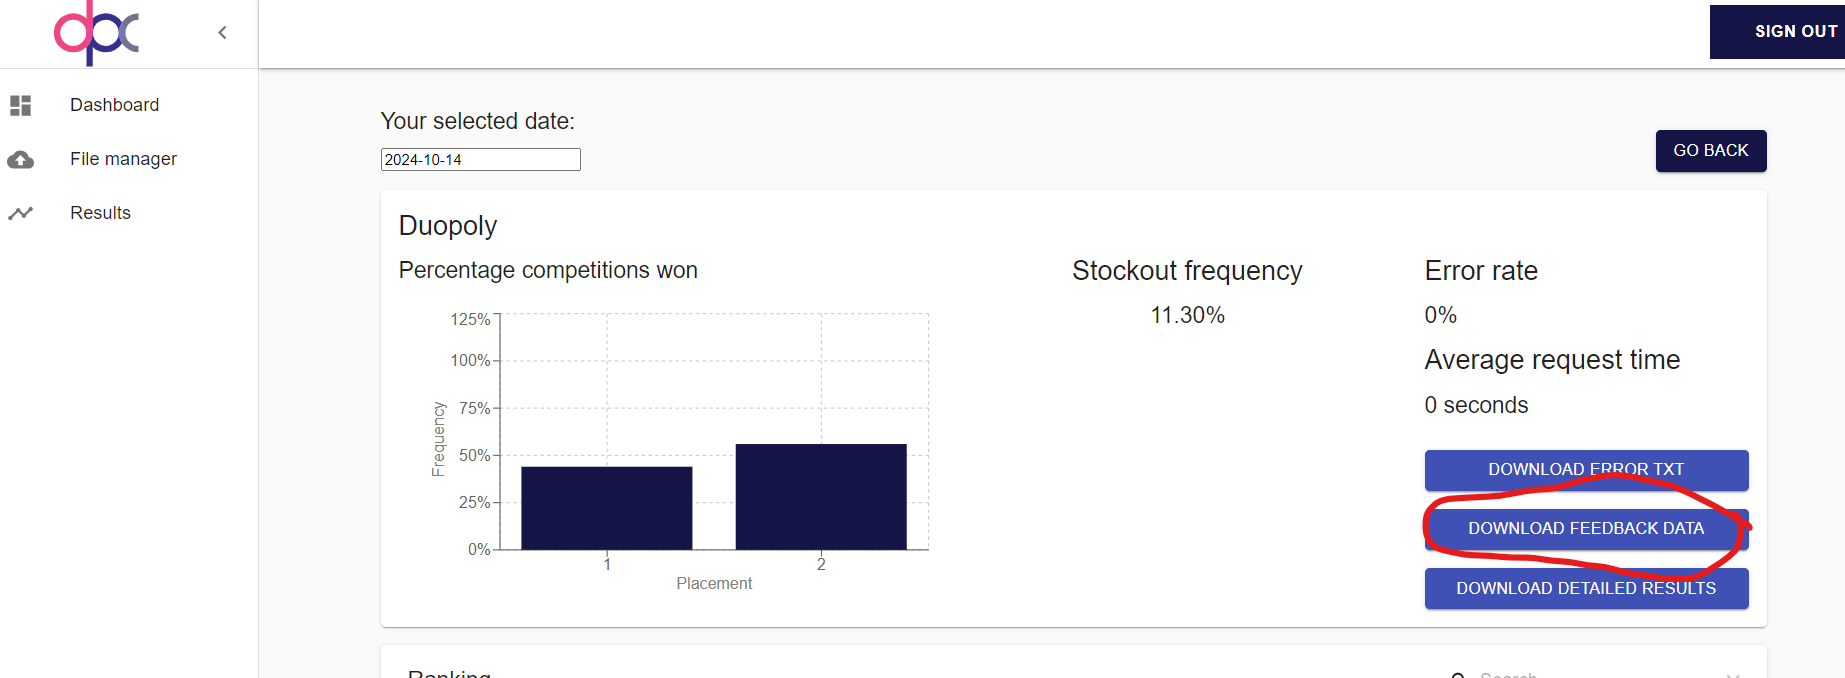

In [4]:
with open('duopoly_feedback.data', 'rb') as handle:
    feedback = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'duopoly_feedback.data'

In [ ]:
feedback.keys()

NameError: name 'feedback' is not defined

In [5]:
feedback['history'].head(10)

NameError: name 'feedback' is not defined

In [ ]:
feedback['current_simulation']

In [ ]:
feedback['cumulative_revenue_current_selling_season']

## (2) load duopoly_competition_details.csv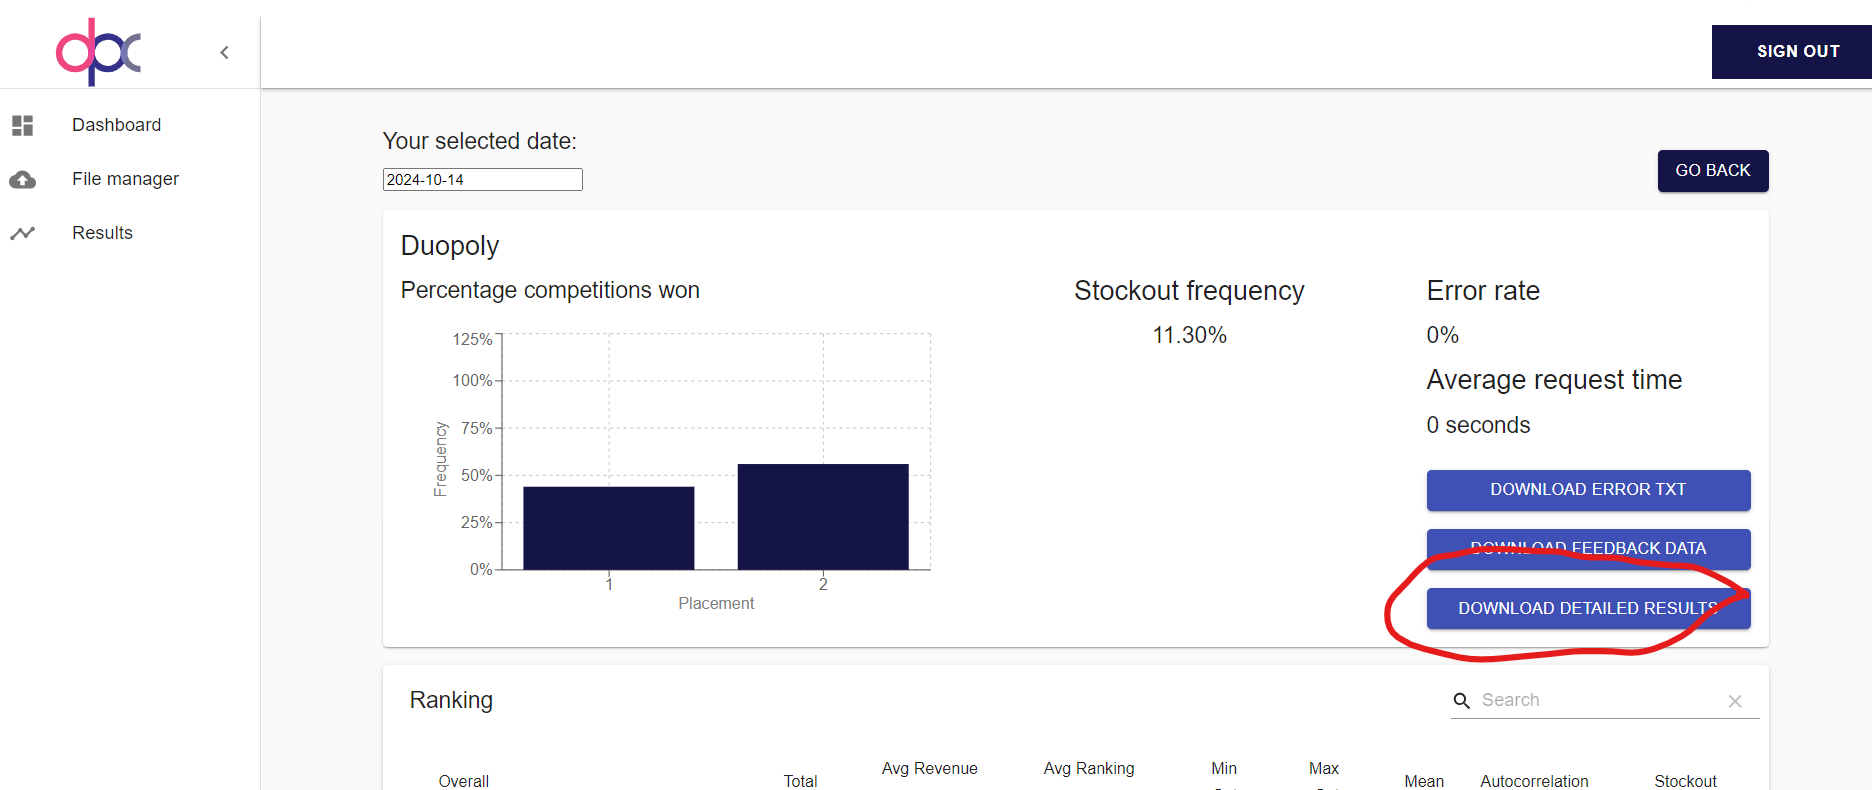

In [3]:
df_comp_details = pd.read_csv('15.11.2025/Quentin/duopoly_competition_details.csv')
df_comp_details.head(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN
3,3eieuu,1,4,DidacticFlounder,37.3,28.8,1,True,0.0,NaN
4,3eieuu,1,5,DidacticFlounder,29.6,32.6,0,True,0.0,NaN
5,3eieuu,1,6,DidacticFlounder,28.1,33.7,0,True,0.0,NaN
6,3eieuu,1,7,DidacticFlounder,26.7,33.7,0,True,0.0,NaN
7,3eieuu,1,8,DidacticFlounder,25.4,32.2,0,True,0.0,NaN
8,3eieuu,1,9,DidacticFlounder,24.1,29.7,2,True,0.0,NaN
9,3eieuu,1,10,DidacticFlounder,32.4,30.6,1,True,0.0,NaN


In [4]:
df_comp_details.groupby('competitor_id').agg({
    'competition_id' : 'nunique',
    'selling_season' : ['max', 'count']
})

competition_id selling_season       
                         nunique            max  count
competitor_id                                         
DidacticFlounder               2            100  20000
ImposingCrocodile              2            100  20000

### create unique selling_season_id

In [5]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply(lambda r:
                                "%s_%s" % (r.competition_id,r.selling_season), axis=1)

df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN,3eieuu_1
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN,3eieuu_1
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN,3eieuu_1


#### show revenue distribution over all selling seasons

In [6]:
df_comp_details['revenue'] = df_comp_details['demand'] * df_comp_details['price']

In [7]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

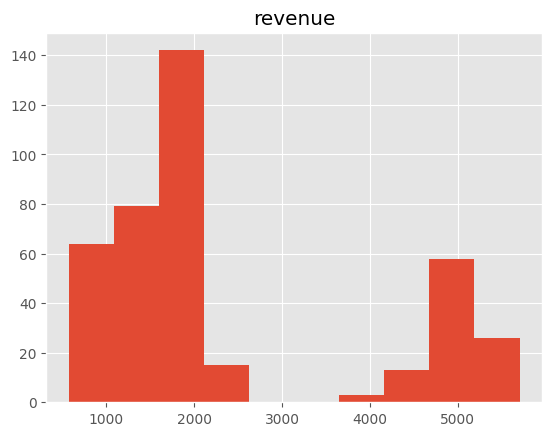

In [8]:
dfx_rev.hist()

In [9]:
dfx_rev_top = dfx_rev.sort_values('revenue', ascending=False)

dfx_rev_top.head(10)

,unique_selling_season_key,revenue
101,3fVyNT_10,5706.4
122,3fVyNT_29,5703.3
199,3fVyNT_99,5603.9
169,3fVyNT_71,5598.1
187,3fVyNT_88,5577.6
188,3fVyNT_89,5540.9
158,3fVyNT_61,5526.2
192,3fVyNT_92,5513.6
142,3fVyNT_47,5503.4
184,3fVyNT_85,5502.3


### visualize the results of one selling season

In [10]:
id = dfx_rev_top['unique_selling_season_key'].values[-200]

df_aux = df_comp_details[df_comp_details.unique_selling_season_key==id]
df_aux.tail(10)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue
21390,3jygWZ,14,91,DidacticFlounder,20.0,24.1,2,False,0.0,NaN,3jygWZ_14,48.2
21391,3jygWZ,14,92,DidacticFlounder,20.0,24.7,1,False,0.0,NaN,3jygWZ_14,24.7
21392,3jygWZ,14,93,DidacticFlounder,20.0,25.3,1,False,0.0,NaN,3jygWZ_14,25.3
21393,3jygWZ,14,94,DidacticFlounder,20.0,25.9,0,False,0.0,NaN,3jygWZ_14,0.0
21394,3jygWZ,14,95,DidacticFlounder,20.0,26.5,0,False,0.0,NaN,3jygWZ_14,0.0
21395,3jygWZ,14,96,DidacticFlounder,20.0,27.0,0,False,0.0,NaN,3jygWZ_14,0.0
21396,3jygWZ,14,97,DidacticFlounder,20.0,27.3,0,False,0.0,NaN,3jygWZ_14,0.0
21397,3jygWZ,14,98,DidacticFlounder,20.0,27.6,0,False,0.0,NaN,3jygWZ_14,0.0
21398,3jygWZ,14,99,DidacticFlounder,20.0,27.8,0,False,0.0,NaN,3jygWZ_14,0.0
21399,3jygWZ,14,100,DidacticFlounder,20.0,28.0,0,False,0.0,NaN,3jygWZ_14,0.0


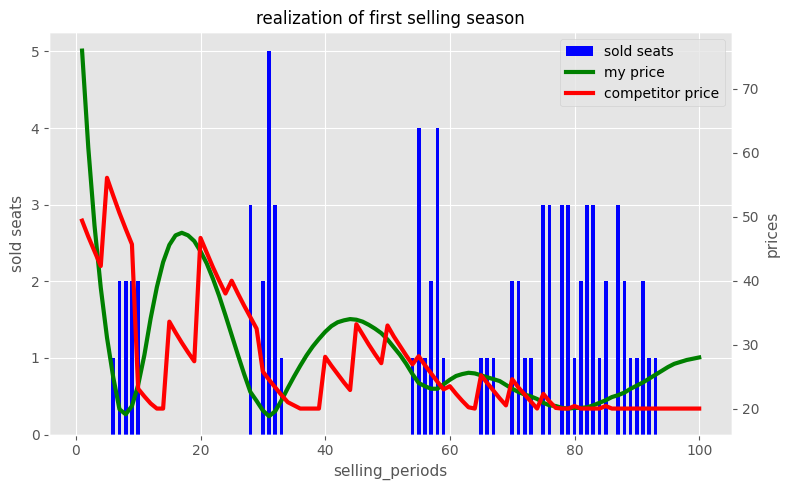

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(df_aux.selling_period, df_aux.demand, color='b', width=0.6, align='center', label = 'sold seats')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("sold seats" , size=11)

ax_2 = ax.twinx()
ax_2.grid(False)
ax_2.plot(df_aux.selling_period, df_aux.price, color='g', linestyle='-', linewidth=3, label = 'my price')
ax_2.plot(df_aux.selling_period, df_aux.price_competitor, color='r', linestyle='-', linewidth=3, label = 'competitor price')
ax_2.tick_params(axis="both", labelsize=10)
ax_2.set_ylabel("prices" , size=11)

ax.tick_params(axis="both", labelsize=10)
ax.set_title("realization of first selling season", size=12)

# legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_2.get_legend_handles_labels()
ax_2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

# Plot the Capacity Utilization Curve

**capacity utilization = sold quantity / capacity**

In [12]:
df_aux['cum_demand'] = df_aux['demand'].cumsum()
df_aux['cap_util'] = round(df_aux[ 'cum_demand'] / 80 ,2)
df_aux.head(15)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue,cum_demand,cap_util
21300,3jygWZ,14,1,DidacticFlounder,49.4,76.0,0,True,0.0,NaN,3jygWZ_14,0.0,0,0.00
21301,3jygWZ,14,2,DidacticFlounder,46.9,60.8,0,True,0.0,NaN,3jygWZ_14,0.0,0,0.00
21302,3jygWZ,14,3,DidacticFlounder,44.6,48.6,0,True,0.0,NaN,3jygWZ_14,0.0,0,0.00
21303,3jygWZ,14,4,DidacticFlounder,42.3,38.9,0,True,0.0,NaN,3jygWZ_14,0.0,0,0.00
21304,3jygWZ,14,5,DidacticFlounder,56.1,31.1,0,True,0.0,NaN,3jygWZ_14,0.0,0,0.00
21305,3jygWZ,14,6,DidacticFlounder,53.3,24.9,1,True,0.0,NaN,3jygWZ_14,24.9,1,0.01
21306,3jygWZ,14,7,DidacticFlounder,50.6,19.9,2,True,0.0,NaN,3jygWZ_14,39.8,3,0.04
21307,3jygWZ,14,8,DidacticFlounder,48.1,19.1,2,True,0.0,NaN,3jygWZ_14,38.2,5,0.06
21308,3jygWZ,14,9,DidacticFlounder,45.7,20.4,2,True,0.0,NaN,3jygWZ_14,40.8,7,0.09
21309,3jygWZ,14,10,DidacticFlounder,23.1,23.7,2,True,0.0,NaN,3jygWZ_14,47.4,9,0.11


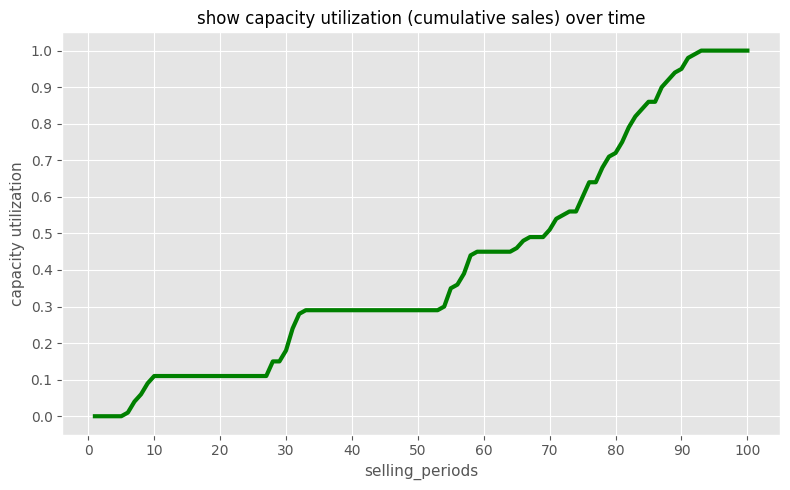

In [13]:
fig, ax = plt.subplots(figsize=(8,5))

# ax.plot(df_aux.selling_period, df_aux.cum_demand, color='b', 
#        width=0.6, align='center', label = 'sold seats')
ax.plot(df_aux.selling_period, df_aux.cap_util, color='g', 
        linestyle='-', linewidth=3, label = 'capacity utilization')
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("show capacity utilization (cumulative sales) over time", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

In [14]:
df_comp_details

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,unique_selling_season_key,revenue
0,3eieuu,1,1,DidacticFlounder,43.5,35.0,0,True,0.0,NaN,3eieuu_1,0.0
1,3eieuu,1,2,DidacticFlounder,41.3,28.0,1,True,0.0,NaN,3eieuu_1,28.0
2,3eieuu,1,3,DidacticFlounder,39.3,26.6,1,True,0.0,NaN,3eieuu_1,26.6
3,3eieuu,1,4,DidacticFlounder,37.3,28.8,1,True,0.0,NaN,3eieuu_1,28.8
4,3eieuu,1,5,DidacticFlounder,29.6,32.6,0,True,0.0,NaN,3eieuu_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jd9PL7,100,96,ImposingCrocodile,54.5,5.0,5,True,0.0,NaN,jd9PL7_100,25.0
39996,jd9PL7,100,97,ImposingCrocodile,57.1,5.0,0,True,0.0,NaN,jd9PL7_100,0.0
39997,jd9PL7,100,98,ImposingCrocodile,68.0,5.0,2,True,0.0,NaN,jd9PL7_100,10.0
39998,jd9PL7,100,99,ImposingCrocodile,63.2,5.1,0,True,0.0,NaN,jd9PL7_100,0.0


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# ==========================
#  Online PyTorch Regressor
# ==========================

class OnlineLinearRegressor(nn.Module):
    def __init__(self, lr=0.01, l2=0.01):
        super().__init__()
        self.lr = lr
        self.l2 = l2
        self.weights = None
        self.bias = nn.Parameter(torch.zeros(1, dtype=torch.float32))

    def _init_weights(self, n_features):
        # initialize or re-initialize weights if feature size changes
        if self.weights is None or self.weights.shape[0] != n_features:
            w = torch.zeros(n_features, dtype=torch.float32)
            self.weights = nn.Parameter(w)

    def predict(self, x_dict: dict):
        x = torch.tensor(list(x_dict.values()), dtype=torch.float32)
        self._init_weights(len(x))
        with torch.no_grad():
            return (x @ self.weights + self.bias).item()

    # compatibility with .predict_one used elsewhere
    def predict_one(self, x_dict: dict):
        return self.predict(x_dict)

    def learn(self, x_dict: dict, y: float):
        x = torch.tensor(list(x_dict.values()), dtype=torch.float32)
        y = torch.tensor([y], dtype=torch.float32)

        self._init_weights(len(x))

        pred = x @ self.weights + self.bias
        # simple squared error + L2 regularization
        loss = (pred - y) ** 2 + self.l2 * (self.weights @ self.weights)

        # compute gradients
        loss.backward()

        # manual SGD step: update .data to keep Parameter objects intact
        with torch.no_grad():
            self.weights.data -= self.lr * self.weights.grad.data
            self.bias.data -= self.lr * self.bias.grad.data

        # zero gradients safely
        if self.weights.grad is not None:
            self.weights.grad.zero_()
        if self.bias.grad is not None:
            self.bias.grad.zero_()

    # compatibility with .learn_one used elsewhere
    def learn_one(self, x_dict: dict, y: float):
        self.learn(x_dict, y)

In [16]:
# ============================================================
#  METRICS pour suivre les performances
# ============================================================

class OnlineMetric:
    def update(self, y, y_pred):
        raise NotImplementedError

    def get(self):
        raise NotImplementedError


class MAE(OnlineMetric):
    def __init__(self):
        self.s = 0
        self.n = 0

    def update(self, y, y_pred):
        self.s += abs(y - y_pred)
        self.n += 1

    def get(self):
        return self.s / self.n if self.n > 0 else 0


class MSE(OnlineMetric):
    def __init__(self):
        self.s = 0
        self.n = 0

    def update(self, y, y_pred):
        self.s += (y - y_pred) ** 2
        self.n += 1

    def get(self):
        return self.s / self.n if self.n > 0 else 0


class RMSE(OnlineMetric):
    def __init__(self):
        self.mse = MSE()

    def update(self, y, y_pred):
        self.mse.update(y, y_pred)

    def get(self):
        return self.mse.get() ** 0.5


class R2(OnlineMetric):
    def __init__(self):
        self.ss_res = 0
        self.ss_tot = 0
        self.n = 0
        self.y_mean = 0

    def update(self, y, y_pred):
        self.n += 1
        old_mean = self.y_mean
        self.y_mean += (y - self.y_mean) / self.n
        self.ss_tot += (y - old_mean) * (y - self.y_mean)
        self.ss_res += (y - y_pred) ** 2

    def get(self):
        if self.ss_tot == 0:
            return 0
        return 1 - self.ss_res / self.ss_tot


In [23]:
df_comp = df_comp_details[df_comp_details['competition_id']=="3fVyNT"] # 3jygWZ


# Standardisation + régression linéaire avec régularisation L2
model = OnlineLinearRegressor(lr=0.00001, l2=0.01)

metrics_list = {
    "R²": R2(),
    "MAE": MAE(),
    "MSE": MSE(),
    "RMSE": RMSE()
}

metric_list_simple = {
    "R²": R2(),
    "MAE": MAE(),
    "MSE": MSE(),
    "RMSE": RMSE()
}

train_test_split = 25

df_comp_train = df_comp[df_comp['selling_season']<=train_test_split]
df_comp_test = df_comp[df_comp['selling_season']>train_test_split]

history = {'price_self' : [], 'price_competitor' : []}

for index, row in df_comp_train.iterrows():
    x = {
        'selling_period': row['selling_period'],
        'price_competitor_lag1': history['price_competitor'][-1] if row['selling_period']>1 else 50.0,
        'price_self_lag1': history['price_self'][-1] if row['selling_period']>1 else 50.0,
        # 'price_competitor_lag2': history['price_competitor'][-2] if row['selling_period']>2 else 0.0,
    }
    y = row['price_competitor']
    
    # Prédiction avant apprentissage
    y_pred = model.predict(x)

    y_pred_simple = history['price_competitor'][-1] if row['selling_period']>1 else 0.0

    # Mise à jour de la métrique
    for m in metrics_list.values():
        if y_pred is not None:
            m.update(y, y_pred)

    for m in metric_list_simple.values():
        if y_pred_simple is not None:
            m.update(y, y_pred_simple)

    # Apprentissage online
    model.learn(x, y)

    # Mettre à jour l'historique pour la prochaine période
    history["price_self"].append(row['price'])
    history["price_competitor"].append(row['price_competitor'])

# Métriques finales
print("Model metrics:")
for name, m in metrics_list.items():
    print(name, m.get())
print("\nSimple prediction metrics:")
for name, m in metric_list_simple.items():
    print(name, m.get())

Model metrics:
R² -0.9520752036557258
MAE 9.899489093894962
MSE 149.59137089921927
RMSE 12.230755123835129

Simple prediction metrics:
R² -1.4465898100123065
MAE 10.718800000000012
MSE 187.48700000000014
RMSE 13.69258923651769


In [24]:
history_test = {'price_self' : [], 'price_competitor' : []}
results = []
results_simple = []
reals = []

for index, row in df_comp_test.iterrows():
    x = {
        'selling_period': row['selling_period'],
        'price_competitor_lag1': history_test['price_competitor'][-1] if row['selling_period']>1 else 50,
        'price_self_lag1': history_test['price_self'][-1] if row['selling_period']>1 else 50,
        # 'price_competitor_lag2': history_test['price_competitor'][-2] if row['selling_period']>2 else 0,
    }
    y = row['price_competitor']
    reals.append(y)
    # Prédiction avant apprentissage
    y_pred = model.predict_one(x)
    results.append(y_pred)

    y_pred_simple = history_test['price_competitor'][-1] if row['selling_period']>1 else 50.0
    results_simple.append(y_pred_simple)

    # Mettre à jour l'historique pour la prochaine période
    history_test["price_self"].append(row['price'])
    history_test["price_competitor"].append(row['price_competitor'])

df_results = pd.DataFrame({
    'real_price_competitor' : reals,
    'pred_price_competitor' : results,
    'pred_price_competitor_simple' : results_simple
})
df_results.head(100)

,real_price_competitor,pred_price_competitor,pred_price_competitor_simple
0,44.7,35.440769,50.0
1,40.0,29.302961,44.7
2,58.4,24.988312,40.0
3,46.3,33.528137,58.4
4,55.0,32.198746,46.3
...,...,...,...
95,55.7,62.852619,59.7
96,50.2,62.199375,55.7
97,55.6,60.891727,50.2
98,65.8,62.900780,55.6


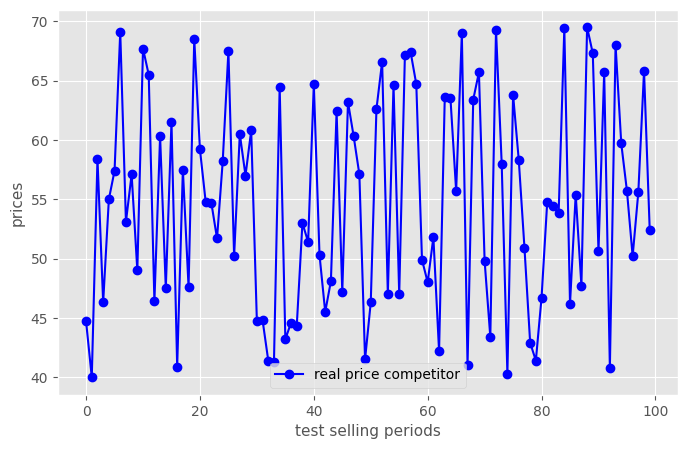

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df_results.index[:100], df_results['real_price_competitor'][:100], 'bo', linestyle='-', label = 'real price competitor')
# ax.plot(df_results.index[:100], df_results['pred_price_competitor'][:100], 'ro', linestyle='--', label = 'predicted price competitor')
# ax.plot(df_results.index[:100], df_results['pred_price_competitor_simple'][:100], 'go', linestyle='--', label = 'simple predicted price competitor')
ax.set_xlabel('test selling periods', size=11)
ax.set_ylabel("prices" , size=11)
ax.legend()
plt.show()

In [26]:
# Accéder au modèle final dans le pipeline


# Coefficients (poids des features)
feature_names = ['selling_period', 'price_competitor_lag1', 'price_self_lag1']
w = model.weights.detach().numpy()
weights_dict = dict(zip(feature_names, w))
print("Coefficients :")
for feature, weight in weights_dict.items():
    print(f"{feature}: {weight:.4f}")

# Interception (bias)
print(f"Intercept: {model.bias.item():.4f}")

Coefficients :
selling_period: 0.0730
price_competitor_lag1: 0.3381
price_self_lag1: 0.3683
Intercept: 0.0516


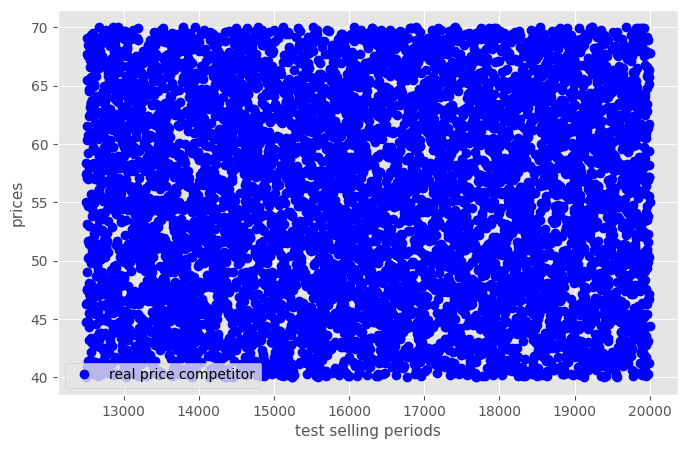

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df_comp_test.index, df_comp_test['price_competitor'], 'bo', label = 'real price competitor')
ax.set_xlabel('test selling periods', size=11)
ax.set_ylabel("prices" , size=11)
ax.legend()
plt.show()